In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
final=pd.read_csv('../data/final.csv')

This shows in every heating type how many houses are in each energy class

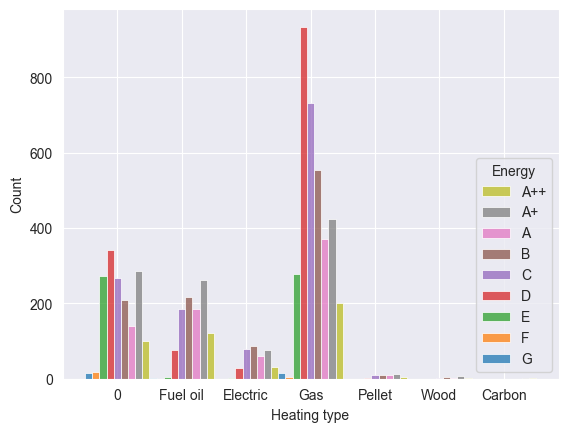

In [67]:
final['Energy class'] = final['Energy class'].astype(str) 
final=final.dropna()
final['Energy class'] = pd.Categorical(final['Energy class'], categories=['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G'])
sns.set_style('darkgrid')
p = sns.histplot(x='Heating type', data=final, hue='Energy class', multiple='dodge')
p.legend(title='Energy',labels=final['Energy class'].sort_values().unique(), loc=4)

plt.show()

Correlation between bedroom and bathroom

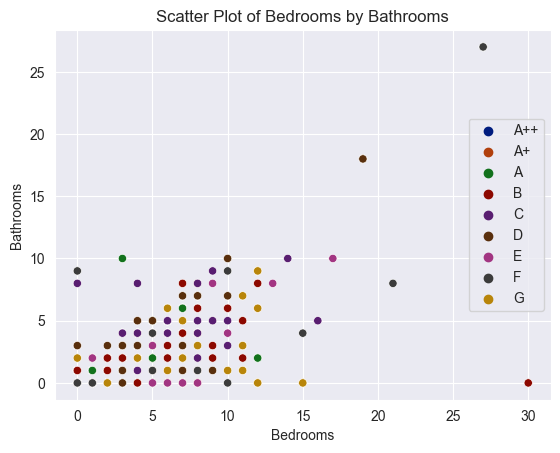

In [63]:
final['Energy class'] = pd.Categorical(final['Energy class'], categories=['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G'])
p = sns.scatterplot(x='Bedrooms', y='Bathrooms', data=final, hue=final['Energy class'], sizes=(50, 800), palette='dark', legend='brief')
p.legend(loc='center right')
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.title('Scatter Plot of Bedrooms by Bathrooms')
plt.show()

To show number of houses with heating type in each province

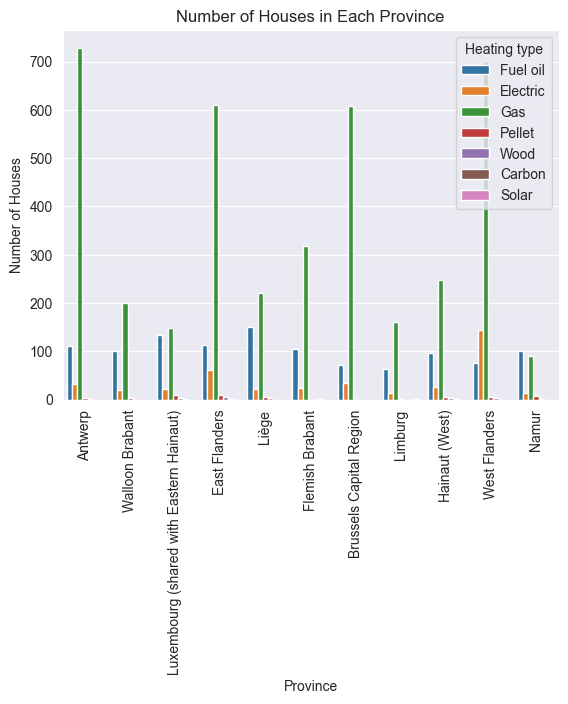

In [34]:
sns.countplot(x='province',hue='Heating type', data=final,hue_order=['Fuel oil', 'Electric', 'Gas', 'Pellet', 'Wood', 'Carbon', 'Solar'])
plt.xlabel('Province')
plt.ylabel('Number of Houses')
plt.title('Number of Houses in Each Province')
plt.xticks(rotation=90)
plt.show()

Number of bedrooms and price correlation.
This shows as number of bedrooms increases price increases

<Axes: xlabel='Bedrooms', ylabel='Price'>

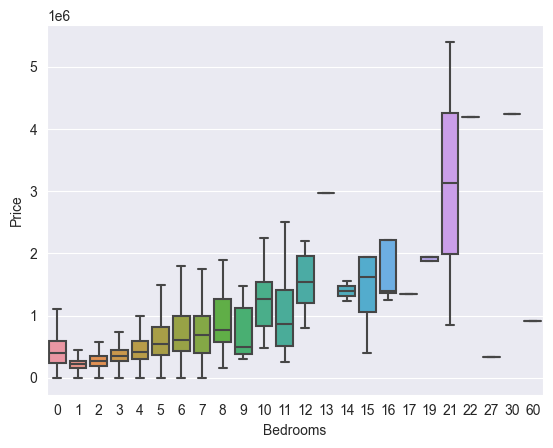

In [77]:
sns.boxplot(y='Price', x='Bedrooms', data=final, showfliers=False)

same with outliers, removed outliers in previous code to get better view of correlation

<Axes: xlabel='Bedrooms', ylabel='Price'>

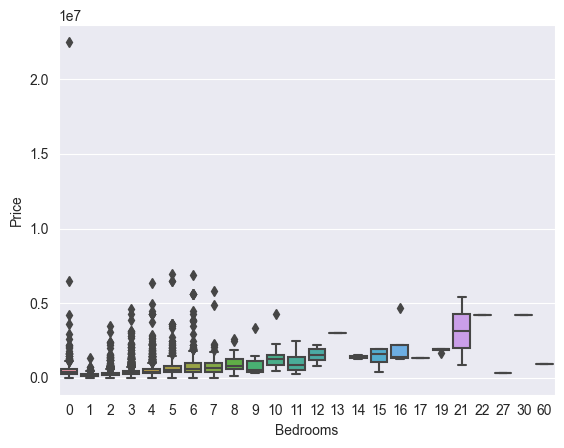

In [78]:
sns.boxplot(y='Price', x='Bedrooms', data=final)

This shows relation between price and Energy class :
* we can see in which energy class price is high and are they furnished or not.
* apparently furnished B and A energy class houses are more pricy. 

Text(0.5, 1.0, 'price vs energy class')

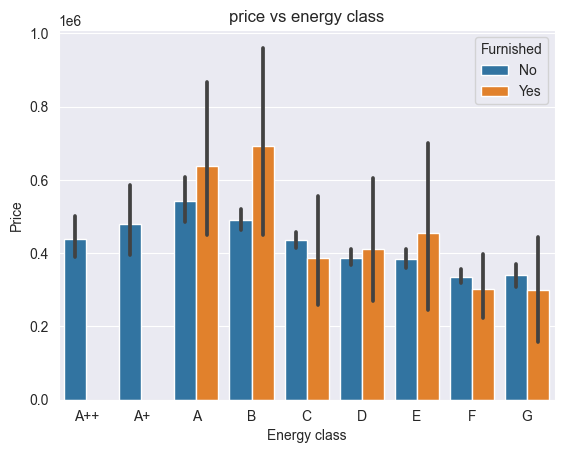

In [79]:
# Mapping dictionary for 'Furnished' column
furnished_map = {0: 'No', 1: 'Yes'}

# Replace the 0 and 1 values with 'No' and 'Yes' using the map() function
final['Furnished'] = final['Furnished'].map(furnished_map)
sns.barplot(x='Energy class', y='Price', data=final, order=['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='Furnished')
plt.title('price vs energy class')

when count of bathroom increases prices increases ( without outliers)

<Axes: xlabel='Bathrooms', ylabel='Price'>

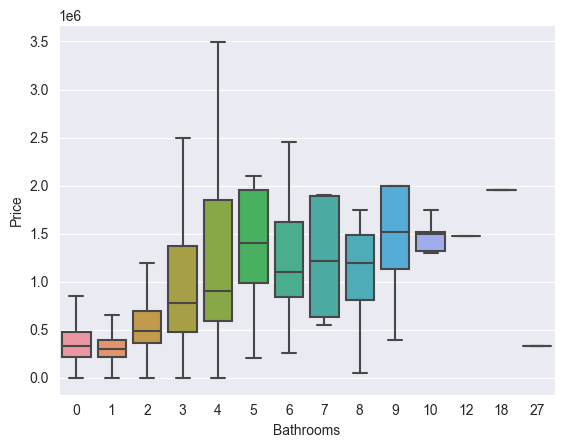

In [80]:
sns.boxplot( y='Price',x= 'Bathrooms', data=final,  showfliers= False)

As you can see there are lot of good( which has high price too) and as new buildings are there after 1950. Before that there are few to renovate catogory houses

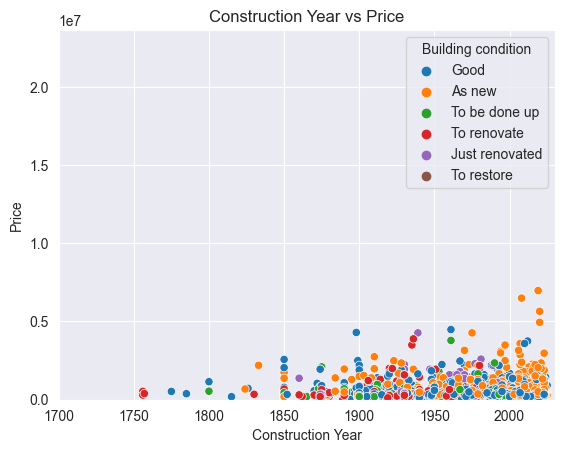

In [82]:
final['Building condition'] = pd.Categorical(final['Building condition'], categories=['Good', 'As new', 'To be done up', 'To renovate', 'Just renovated', 'To restore'])
sns.scatterplot(x='Construction year', y='Price', data=final, hue='Building condition', legend='brief')
plt.xlim(1700, 2030)
plt.ylim(0, None)
plt.title('Construction Year vs Price')
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.show()

As we can see there is alot of good and as new houses with high range of price (with outliers)

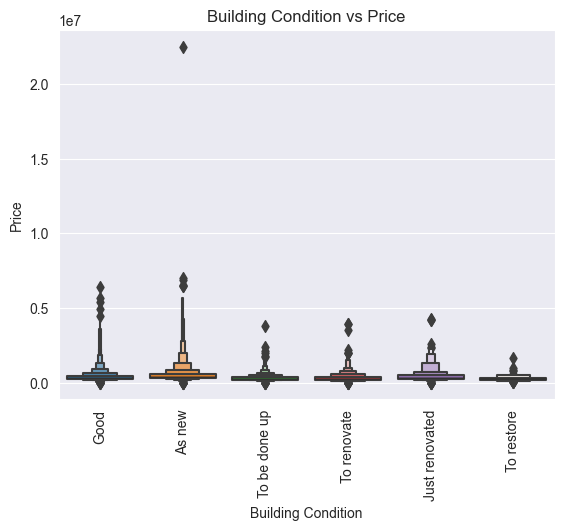

In [83]:
categories = ['Good', 'As new', 'To be done up', 'To renovate', 'Just renovated', 'To restore']

sns.boxenplot(x='Building condition', y='Price', data=final, order=categories)
plt.title('Building Condition vs Price')
plt.xlabel('Building Condition')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

for low range of price we have 'to restore' and 'to be done up' section ( without outliers for clear view)

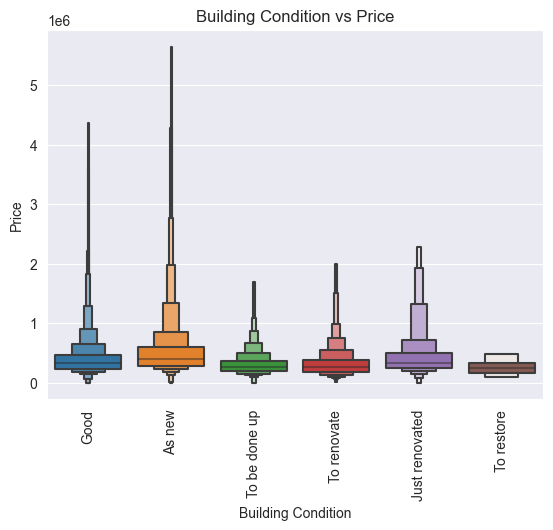

In [84]:
categories = ['Good', 'As new', 'To be done up', 'To renovate', 'Just renovated', 'To restore']

sns.boxenplot(x='Building condition', y='Price', data=final, order=categories, showfliers=False)
plt.title('Building Condition vs Price')
plt.xlabel('Building Condition')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

Comparing bedrooms, bathrooms, toilets, number of frontages, terrace and office rooms. Bedrooms and frontages has higher count in mean
* office and terrace has large percentage of missing values so calculating mean percentage would be possibly low
* number of frontages and  toilets have around 30% of missing values.
* bedrooms , bathrooms and shower rooms have only few percentage of missing values.
* (ref : data_analysis.ipynb)

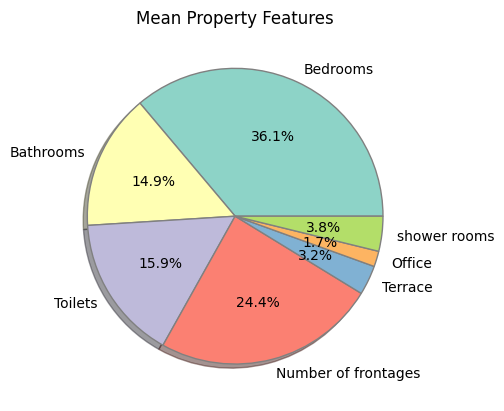

In [2]:
# Calculate the mean values
bedroom_mean = final['Bedrooms'].mean()
bathroom_mean = final['Bathrooms'].mean()
toilets_mean = final['Toilets'].mean()
front_mean = final['Number of frontages'].mean()
terrace_mean = final['Terrace'].mean()
office_mean=final['Office'].mean()
shower_mean=final['Shower rooms'].mean()

# Create a list of labels and corresponding mean values
labels = ['Bedrooms', 'Bathrooms', 'Toilets', 'Number of frontages', 'Terrace','Office', 'shower rooms']
values = [bedroom_mean, bathroom_mean, toilets_mean, front_mean, terrace_mean, office_mean, shower_mean]

# Create a pie chart using matplotlib
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=plt.cm.Set3.colors, shadow=True,  wedgeprops={'edgecolor': 'gray', 'linewidth': 1})

plt.title('Mean Property Features')
plt.show()